# Data Cleaning
#### First: Open the three data sets
#### Second: Clean the data by removing rows that have values which are missing, changing the data type of some values within a column, and removing columns which are not relevant to this task.
#### Think about how each column might be relevant to the business question you’re investigating. If you can’t think of why a column may be useful, it may not be worth including it.
Your end result should be three cleaned data sets. 
If you get stuck, we’ll provide some guidance in the next step. But we encourage you to give it a go first!

In [1]:
import pandas as pd
import numpy as np
#import pydrive
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)

## Loading Reaction Types data

In [2]:
# loading Reaction Types data
rt_url = 'https://drive.google.com/file/d/1ky9BBF3xSgC93zhLdWbDlF-9-L_4iGKK/view?usp=drive_link'
rt_path = 'https://drive.google.com/uc?export=download&id='+rt_url.split('/')[-2]
data_rt = pd.read_csv(rt_path)
data_rt.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [3]:
data_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


### Dropping unnecessary columns

In [4]:
# dropping unnecessary columns by column indices
columns_to_drop = [data_rt.columns[0]] # Dropping unnamed column by index and named column by name
data_rt.drop(columns=columns_to_drop, inplace=True)  # Dropping changes directly to the DataFrame data_rt


In [5]:
# Renaming column name
data_rt.rename(columns={'Type': 'Reaction Type'}, inplace=True)

### Displaying Clean Data : Reaction Type

In [6]:
data_rt

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [7]:
# Saving clean data in csv format
file_path = 'C:/Users/Atif/Documents/Atif/3 Internships/Accenture Data Analysis internship/ReactionTypes_cleaned_data.csv'
data_rt.to_csv(file_path, index=False)

# Loading Reactions data

In [9]:
# loading Reactions data
r_url = 'https://drive.google.com/file/d/1LKulWIZqAgEj8f-MI8OKwrjsxmc5Mt6l/view?usp=drive_link'
r_path = 'https://drive.google.com/uc?export=download&id='+r_url.split('/')[-2]
data_r = pd.read_csv(r_path)
data_r.head(3)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51


### Dropping unnecessary columns

In [10]:
# dropping unnecessary columns by column indices
columns_to_drop = [data_r.columns[0],'User ID'] # Dropping unnamed column by index and named column by name
data_r.drop(columns=columns_to_drop, inplace=True)  # Dropping changes directly to the DataFrame data_r

In [11]:
data_r.shape # Rows and column

(25553, 3)

In [12]:
data_r.head(3)

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51


## Identifying null values

In [13]:
na_values = data_r.isnull().any() # Checking na values
na_values

Content ID    False
Type           True
Datetime      False
dtype: bool

In [14]:
# Total number of missing values columns
na_values.sum().sum()

1

In [15]:
na_values = data_r.isnull() # identifying na values
na_count = na_values.sum() # counting na values
na_count

Content ID      0
Type          980
Datetime        0
dtype: int64

In [16]:
# Total null values in data_r
na_count.sum()

980

<Axes: >

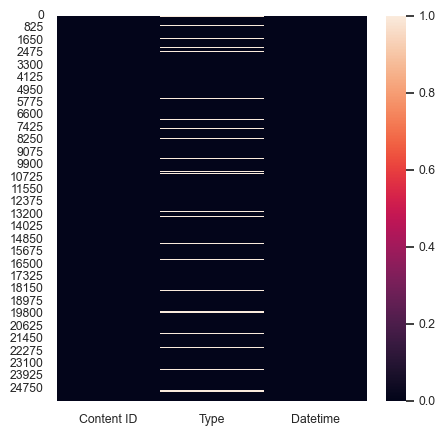

In [17]:
#plotting null values
plt.figure(figsize=(5,5))
sns.set(font_scale = 0.8)
sns.heatmap(data_r.isnull())

### Dropping na rows

In [18]:
#dropping na rows if missing data is less or equal to 5%
data_r.dropna(axis=0, how= 'any', inplace=True) # axix = rows

In [19]:
data_r.shape # Rows and columns after dropping na's

(24573, 3)

In [20]:
data_r.isna().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

<Axes: >

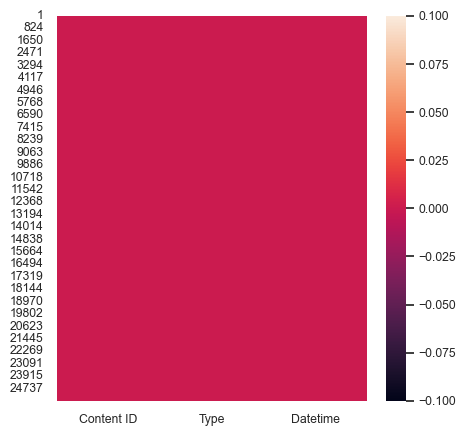

In [21]:
# plot after dropping null values
plt.figure(figsize=(5,5))
sns.set(font_scale = 0.8)
sns.heatmap(data_r.isnull())

### Displaying Cleaned Data: Reactions

In [22]:
# Renaming column name
data_r.rename(columns={'Type': 'Reaction Type'}, inplace=True)

In [23]:
data_r.head(3)

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58


In [24]:
# Saving clean data in csv format
file_path = 'C:/Users/Atif/Documents/Atif/3 Internships/Accenture Data Analysis internship/Reactions_cleaned_data.csv'
data_r.to_csv(file_path, index=False)

### Adding a default or filling a missing data

In [25]:
#data_r_with_0 = data_r.fillna(0)
#data_r_with_0.head()

In [26]:
# filling it with mean
#data_r['Datetime'].mean()

In [27]:
#data_r_with_mean = data_r.Datetime.fillna(data_r['Datetime'].mean())

### Loading Content data

In [29]:
# loading Content data
c_url = 'https://drive.google.com/file/d/1vnJ5Cb8EF8kYpZmgw2Iy-4n3eXMEYZ9q/view?usp=drive_link'
c_path = 'https://drive.google.com/uc?export=download&id='+c_url.split('/')[-2]
data_c = pd.read_csv(c_path)
data_c.head(9)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
6,6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs,https://socialbuzz.cdn.com/content/storage/3f8...
7,7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology,https://socialbuzz.cdn.com/content/storage/e54...
8,8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...


In [30]:
data_c.shape

(1000, 6)

In [31]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [32]:
### Dropping unnecessary columns

In [33]:
# dropping unnecessary columns by column indices
columns_to_drop = [data_c.columns[0],'User ID','URL'] # Dropping unnamed column by index and named column by name
data_c.drop(columns=columns_to_drop, inplace=True)  # Dropping changes directly to the DataFrame data_c

In [34]:
data_c.shape # Rows and column

(1000, 3)

In [37]:
# Renaming column name
data_c.rename(columns={'Type': 'Content Type'}, inplace=True)

In [38]:
data_c.head(3)

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating


## Identifying null values

In [39]:
na_values = data_c.isnull().any() # Checking na values
na_values

Content ID      False
Content Type    False
Category        False
dtype: bool

In [40]:
# Total number of missing values columns
na_values.sum().sum()

0

<Axes: >

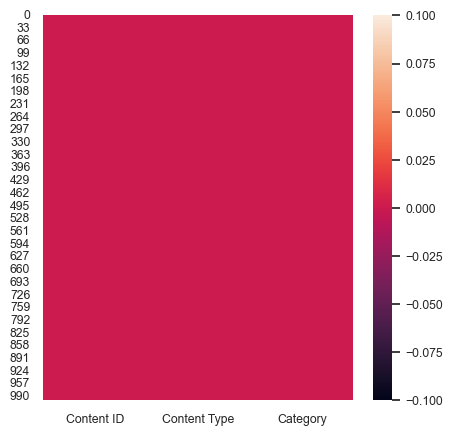

In [41]:
# plot after cleaning null values
plt.figure(figsize=(5,5))
sns.set(font_scale = 0.8)
sns.heatmap(data_c.isnull())

In [42]:
### Displaying Cleaned Data: Contents

In [43]:
data_c

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [44]:
data_c['Category']

0             Studying
1       healthy eating
2       healthy eating
3           technology
4                 food
            ...       
995    public speaking
996         technology
997           veganism
998            culture
999         technology
Name: Category, Length: 1000, dtype: object

In [45]:
# Standardizing the column
data_c['Category'] = data_c['Category'].str.lower() # Step 1: Convert to lowercase
data_c['Category']  = data_c['Category'].str.strip()  # Step 2: Remove leading/trailing whitespace

# Optionally, remove punctuation and special characters if needed:
data_c['Category'] = data_c['Category'].str.replace('[^\w\s]', '', regex=True)

# Step 4: Split text into words (assuming space-separated words) for eg.[healthy, eating]
# data_c['Category'] = data_c['Category'].str.split()

# Example: Count occurrences of a word (e.g., 'apple')
#word_to_count = data_c['Category'] 
#df['Count'] = data_c['Category'] .apply(lambda words: words.count(word_to_count))

# Print the DataFrame with counts
#print(df)

In [46]:
# Saving clean data in csv format
file_path = 'C:/Users/Atif/Documents/Atif/3 Internships/Accenture Data Analysis internship/Content_cleaned_data.csv'
data_c.to_csv(file_path, index=False)

## Category Count and sorted in descending

In [47]:
import pandas as pd
from collections import Counter

data = data_c['Category']
df = pd.DataFrame(data)

# Step 1: Flatten the words in the 'Text' column
all_words = ' '.join(df['Category'])

# Step 2: Split the flattened text into individual words
words_list = all_words.split()

# Step 3: Count the occurrences of each word
word_counts = Counter(words_list)

# Step 4: Create a DataFrame with word counts and their words
word_count_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])
word_count_df.index.name = 'CategoryType'

# Sort the DataFrame by the 'Score' column in descending order
df_sorted = word_count_df.sort_values(by='Count', ascending=False)

# Print the DataFrame with word counts
df_sorted

,Count
CategoryType,
technology,73
animals,72
travel,69
science,68
culture,67
fitness,66
food,64
soccer,64
eating,62


In [49]:
# Saving clean data in csv format
file_path = 'C:/Users/Atif/Documents/Atif/3 Internships/Accenture Data Analysis internship/CategoryType_wise_count.csv'
df_sorted.to_csv(file_path, index=True) # index=True to include row index in csv file

In [50]:
data_r

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
...,...,...,...
25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48
25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02
25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58
25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31


In [51]:
import pandas as pd

# Merge the DataFrames based on the 'Content ID' and Type column
merged_df = data_r.merge(data_c, on='Content ID', how='inner').merge(data_rt, on='Reaction Type', how='inner')

print(data_r.shape, data_c.shape, data_rt.shape, merged_df.shape)

(24573, 3) (1000, 3) (16, 3) (24573, 7)


In [52]:
# Print the merged DataFrame
merged_df.head(3)

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0


In [53]:
merged_df.isnull().sum()

Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

In [54]:
# Saving cleaned merged dataset in csv format
file_path_mdf = 'C:/Users/Atif/Documents/Atif/3 Internships/Accenture Data Analysis internship/merged_df.csv'
merged_df.to_csv(file_path_mdf, index=True) # index=True to include row index in csv file

# Result

In [111]:
# Sum up the 'Score' column based on 'Category'
result = merged_df.groupby('Category')['Score'].sum().reset_index()

# Sort the DataFrame by the 'Score' column in descending order
result_sorted = result.sort_values(by='Score', ascending=False)

# Print the result
result_sorted

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676
2,culture,66579
14,travel,64880
1,cooking,64756
10,soccer,57783
4,education,57436


In [112]:
# Insert serial numbers as a new column
result_sorted['Ranking'] = range(1, len(result_sorted) + 1)

In [113]:
# Reorder the columns, placing 'Ranking' first
result_sorted = result_sorted[['Ranking'] + [col for col in result_sorted.columns if col != 'Ranking']]

In [114]:
result_sorted.reset_index(drop=True) # Dropping indices

,Ranking,Category,Score
0,1,animals,74965
1,2,science,71168
2,3,healthy eating,69339
3,4,technology,68738
4,5,food,66676
5,6,culture,66579
6,7,travel,64880
7,8,cooking,64756
8,9,soccer,57783
9,10,education,57436


In [115]:
# Saving clean data in csv format
file_path_top5 = 'C:/Users/Atif/Documents/Atif/3 Internships/Accenture Data Analysis internship/The_top_5_categories.csv'
result_sorted.to_csv(file_path_top5, index=False) # index=True to include row index in csv file

In [116]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Read the DataFrames from CSV files
merged_df = pd.read_csv('merged_df.csv')
top5 = pd.read_csv('The_top_5_categories.csv')

# Create an Excel writer object
writer = pd.ExcelWriter('cleaned_dataset_with_top_5_categories.xlsx', engine='openpyxl')

# Write 'merged_df' to a separate sheet
merged_df.to_excel(writer, sheet_name='merged_df', index=False)

# Write 'top5' to a separate sheet
top5.to_excel(writer, sheet_name='top5', index=False)

# Save and close the Excel writer
writer.save()

C:\Users\Atif\AppData\Local\Temp\ipykernel_2680\1501274541.py:19: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## Uncover Insights

## The top 5 content categories in a pie chart and in a bar chart

Top 5 category
S.No
1           Animals
2           Science
3    Healthy eating
4        Technology
5              Food
Name: Category, dtype: object


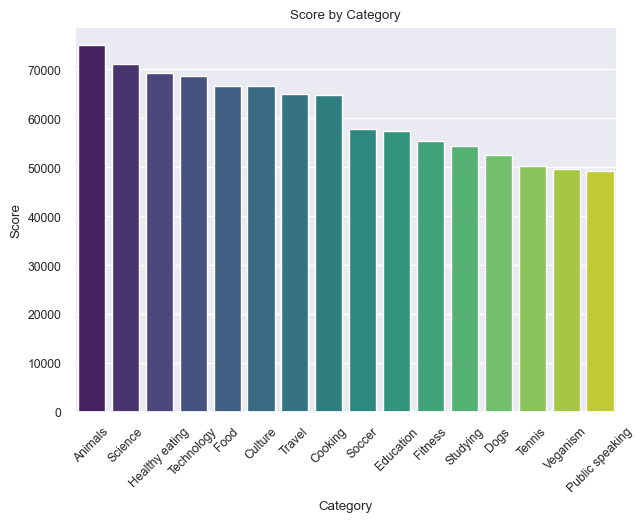

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the data to a DataFrame
#df = pd.DataFrame(result_sorted)


# Create a DataFrame from the unique_categories_sorted
#result_sorted = pd.DataFrame({'df': Category})

# Capitalize the values in the 'Category' column
result_sorted['Category'] = df['Category'].str.capitalize()

# Reset the index starting from 1
result_sorted.index = range(1, len(result_sorted) + 1)

# Rename the index column to 'S.No'
result_sorted.index.name = 'S.No'

# Rename the column '0' to 'Top 5 Categories'
result_sorted.rename(columns={1: 'Top 5 Categories'}, inplace=True)

# Bar plot with Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x='Category', y='Score', data=result_sorted, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Score by Category')
plt.xticks(rotation=45)
print("Top 5 category")
print(result_sorted['Category'].head(5))
plt.show()

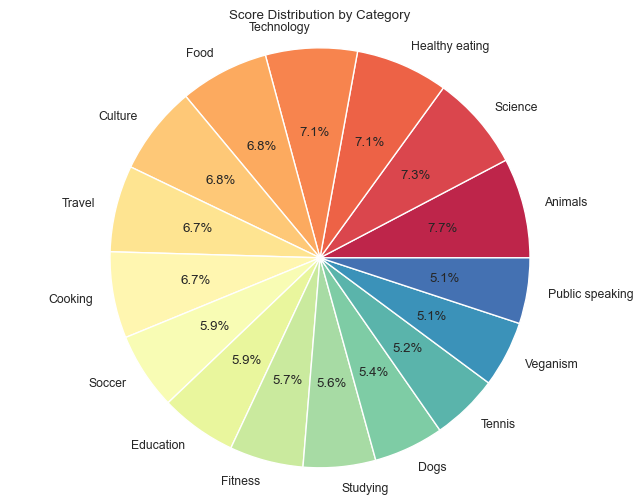

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the data to a DataFrame
df = pd.DataFrame(result_sorted)

# Create a pie chart with Seaborn
plt.figure(figsize=(8, 6))
plt.pie(df['Score'], labels=df['Category'], autopct='%1.1f%%', colors=sns.color_palette('Spectral',len(df)))
plt.title('Score Distribution by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Other Interesting Insights

### 1-How many unique categories are there?

In [63]:
# Assuming you have already created the 'unique_categories' list
unique_categories = merged_df['Category'].unique().tolist()

# Sort the unique categories alphabetically
unique_categories_sorted = sorted(unique_categories)

# Create a DataFrame from the unique_categories_sorted
sorted_df = pd.DataFrame({'Unique_Categories': unique_categories_sorted})

# Capitalize the values in the 'Unique_Categories' column
sorted_df['Unique_Categories'] = sorted_df['Unique_Categories'].str.capitalize()

# Reset the index starting from 1
sorted_df.index = range(1, len(sorted_df) + 1)

# Rename the index column to 'S.No'
sorted_df.index.name = 'S.No'

unique_count = sorted_df.count()
print("How many unique categories are there?")
print(f" The count of {unique_count}")
sorted_df

How many unique categories are there?
 The count of Unique_Categories    16
dtype: int64


,Unique_Categories
S.No,
1,Animals
2,Cooking
3,Culture
4,Dogs
5,Education
6,Fitness
7,Food
8,Healthy eating
9,Public speaking


### 2-How many reactions are there to the most popular category ?

How many reactions are there to the most popular category?
The most popular category have : 1897 reactions.


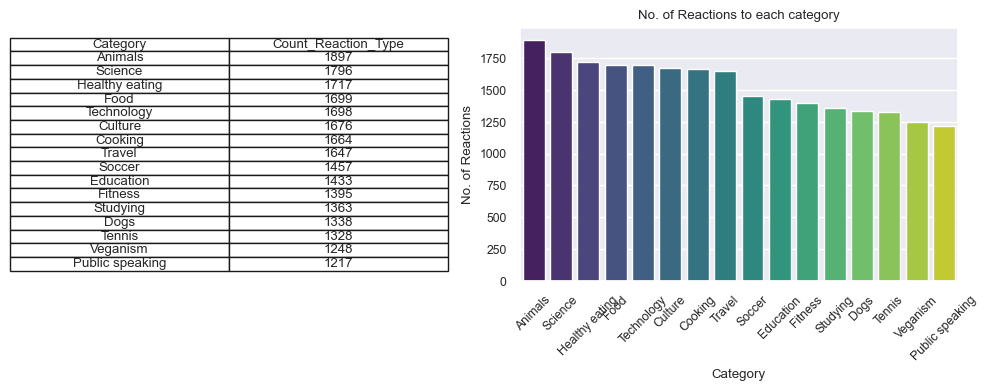

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the 'Reactions type' for reactions received on each 'Category'
result_r = merged_df.groupby('Category')['Reaction Type'].count().reset_index()

# Sort the DataFrame by the 'Reaction Type' count in descending order
result_sorted_r = result_r.sort_values(by='Reaction Type', ascending=False)

# Capitalize the values in the 'Category' column
result_sorted_r['Category'] = result_sorted_r['Category'].str.capitalize()

# Reset the index starting from 1
result_sorted_r.index = range(1, len(result_sorted_r) + 1)

# Rename the index column to 'S.No'
result_sorted_r.index.name = 'S.No'

# Rename the 'Old_Column_Name' to 'New_Column_Name'
result_sorted_r.rename(columns={'Reaction Type': 'Count_Reaction_Type'}, inplace=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: DataFrame table
ax1 = axes[0]
ax1.axis('off')  # Turn off axis
table_data = [result_sorted_r.columns] + result_sorted_r.values.tolist()
ax1.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')

# Plot 2: Bar plot
ax2 = axes[1]
sns.barplot(x='Category', y='Count_Reaction_Type', data=result_sorted_r, palette='viridis', ax=ax2)
ax2.set_xlabel('Category')
ax2.set_ylabel('No. of Reactions')
ax2.set_title('No. of Reactions to each category')
ax2.set_xticklabels(result_sorted_r['Category'], rotation=45)

print(f"How many reactions are there to the most popular category?")
print(f"The most popular category have : {result_sorted_r['Count_Reaction_Type'][1]} reactions.")

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined visualization
plt.show()

## 3-What was the month with the most posts?

C:\Users\Atif\AppData\Local\Temp\ipykernel_2680\1540320240.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(result_new_df['Month'], rotation=45)


What was the month with the most posts?
The month with the most posts is : May.


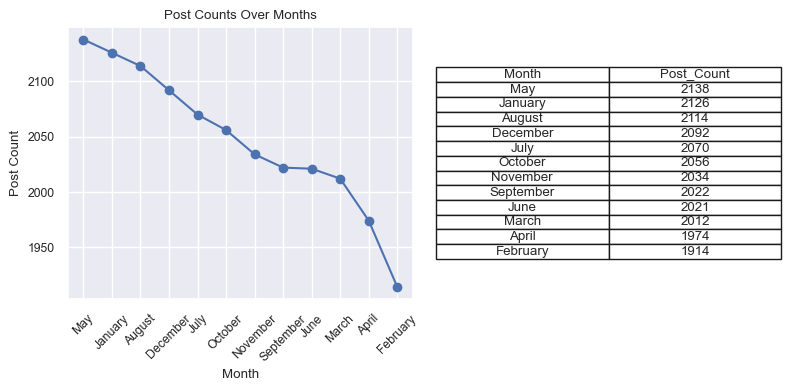

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'Datetime' column to datetime data type
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'])

# Extract the month and create a new 'Month' column
merged_df['Month'] = merged_df['Datetime'].dt.strftime('%B')

# Count the posts for each month
month_counts = merged_df['Month'].value_counts()

# Creating new DataFrame with named columns
result_new_df = pd.DataFrame({'Month': month_counts.index, 'Post_Count': month_counts.values})

# Find the month with the most posts
most_posts_month = month_counts.idxmax()

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4) )

# Line plot on the left subplot (ax1)
ax1.plot(result_new_df['Month'], result_new_df['Post_Count'], marker='o', linestyle='-', color='b')
ax1.set_xlabel('Month')
ax1.set_ylabel('Post Count')
ax1.set_title('Post Counts Over Months')
ax1.set_xticklabels(result_new_df['Month'], rotation=45)
ax1.grid(True)

# Table on the right subplot (ax2)
ax2.axis('off')  # Turn off axis
table_data = [result_new_df.columns] + result_new_df.values.tolist()
ax2.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')

# Adjust spacing between subplots
plt.tight_layout()
print(f"What was the month with the most posts?")
# Print the message with the most posts month
print(f"The month with the most posts is : {most_posts_month}.")
# Show the combined visualization
plt.show()